<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0__4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20-4.csv',
 'data_multi_delta_0_n30-4.csv',
 'data_multi_delta_0_n60-4.csv',
 'data_multi_delta_0_n120-4.csv',
 'data_multi_delta_0_n250-4.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n30-4.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.557885,36.190450,76.385281,1.153557,162.287174,161.131195,1.155979
1,0.0,1.0,58.190050,51.637326,55.257372,-2.373410,172.711338,175.086852,-2.375513
2,0.0,2.0,97.165167,35.182107,26.926808,-0.087220,169.186862,169.136325,0.050537
3,0.0,3.0,40.124966,22.211379,70.036990,-0.339428,142.033908,142.281100,-0.247193
4,0.0,4.0,87.334460,59.722009,59.733722,0.077565,216.867755,216.898861,-0.031107
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,84.302710,68.687000,54.330015,2.511087,219.830813,217.503491,2.327321
29996,999.0,26.0,21.809600,60.069007,76.650314,-1.222839,167.306081,168.528939,-1.222858
29997,999.0,27.0,28.573476,85.356866,49.274165,1.676026,174.880533,173.499493,1.381040
29998,999.0,28.0,64.380220,64.454498,29.514238,0.575680,168.924636,168.583904,0.340732


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.557885,36.190450,76.385281,1.153557,162.287174,161.131195,1.155979
1,0.0,1.0,58.190050,51.637326,55.257372,-2.373410,172.711338,175.086852,-2.375513
2,0.0,2.0,97.165167,35.182107,26.926808,-0.087220,169.186862,169.136325,0.050537
3,0.0,3.0,40.124966,22.211379,70.036990,-0.339428,142.033908,142.281100,-0.247193
4,0.0,4.0,87.334460,59.722009,59.733722,0.077565,216.867755,216.898861,-0.031107
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,84.302710,68.687000,54.330015,2.511087,219.830813,217.503491,2.327321
29996,999.0,26.0,21.809600,60.069007,76.650314,-1.222839,167.306081,168.528939,-1.222858
29997,999.0,27.0,28.573476,85.356866,49.274165,1.676026,174.880533,173.499493,1.381040
29998,999.0,28.0,64.380220,64.454498,29.514238,0.575680,168.924636,168.583904,0.340732


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    38.557885  36.190450  76.385281  ...  162.287174  161.131195  1.155979
      1.0    58.190050  51.637326  55.257372  ...  172.711338  175.086852 -2.375513
      2.0    97.165167  35.182107  26.926808  ...  169.186862  169.136325  0.050537
      3.0    40.124966  22.211379  70.036990  ...  142.033908  142.281100 -0.247193
      4.0    87.334460  59.722009  59.733722  ...  216.867755  216.898861 -0.031107
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   84.302710  68.687000  54.330015  ...  219.830813  217.503491  2.327321
      26.0   21.809600  60.069007  76.650314  ...  167.306081  168.528939 -1.222858
      27.0   28.573476  85.356866  49.274165  ...  174.880533  173.499493  1.381040
      28.0   64.380220  64.454498  29.514238  ...  168.924636  168.583904  0.340732
      29.0   62.798537  91.752569  98.500563  ...  262.395454  263.227289 -0.831834

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    38.557885  36.190450  76.385281  ...  162.287174  161.131195  1.155979
      1.0    58.190050  51.637326  55.257372  ...  172.711338  175.086852 -2.375513
      2.0    97.165167  35.182107  26.926808  ...  169.186862  169.136325  0.050537
      3.0    40.124966  22.211379  70.036990  ...  142.033908  142.281100 -0.247193
      4.0    87.334460  59.722009  59.733722  ...  216.867755  216.898861 -0.031107
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   84.302710  68.687000  54.330015  ...  219.830813  217.503491  2.327321
      26.0   21.809600  60.069007  76.650314  ...  167.306081  168.528939 -1.222858
      27.0   28.573476  85.356866  49.274165  ...  174.880533  173.499493  1.381040
      28.0   64.380220  64.454498  29.514238  ...  168.924636  168.583904  0.340732
      29.0   62.798537  91.752569  98.500563  ...  262.395454  263.227289 -0.831834

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.557885,36.190450,76.385281,1.153557,162.287174,161.131195,1.155979
1,0.0,1.0,58.190050,51.637326,55.257372,-2.373410,172.711338,175.086852,-2.375513
2,0.0,2.0,97.165167,35.182107,26.926808,-0.087220,169.186862,169.136325,0.050537
3,0.0,3.0,40.124966,22.211379,70.036990,-0.339428,142.033908,142.281100,-0.247193
4,0.0,4.0,87.334460,59.722009,59.733722,0.077565,216.867755,216.898861,-0.031107
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,84.302710,68.687000,54.330015,2.511087,219.830813,217.503491,2.327321
29996,999.0,26.0,21.809600,60.069007,76.650314,-1.222839,167.306081,168.528939,-1.222858
29997,999.0,27.0,28.573476,85.356866,49.274165,1.676026,174.880533,173.499493,1.381040
29998,999.0,28.0,64.380220,64.454498,29.514238,0.575680,168.924636,168.583904,0.340732


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    38.557885  36.190450  76.385281  ...  162.287174  161.131195  1.155979
      1.0    58.190050  51.637326  55.257372  ...  172.711338  175.086852 -2.375513
      2.0    97.165167  35.182107  26.926808  ...  169.186862  169.136325  0.050537
      3.0    40.124966  22.211379  70.036990  ...  142.033908  142.281100 -0.247193
      4.0    87.334460  59.722009  59.733722  ...  216.867755  216.898861 -0.031107
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   84.302710  68.687000  54.330015  ...  219.830813  217.503491  2.327321
      26.0   21.809600  60.069007  76.650314  ...  167.306081  168.528939 -1.222858
      27.0   28.573476  85.356866  49.274165  ...  174.880533  173.499493  1.381040
      28.0   64.380220  64.454498  29.514238  ...  168.924636  168.583904  0.340732
      29.0   62.798537  91.752569  98.500563  ...  262.395454  263.227289 -0.831834

[30000 rows x 7 columns]

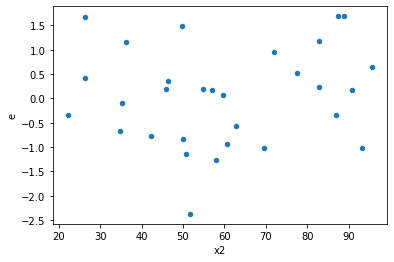

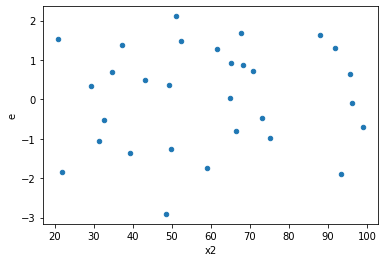

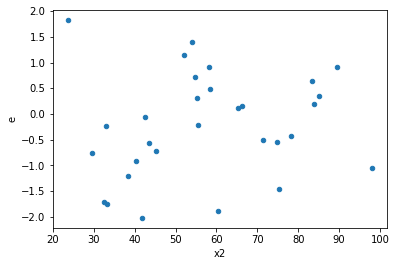

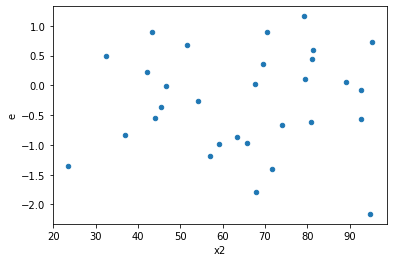

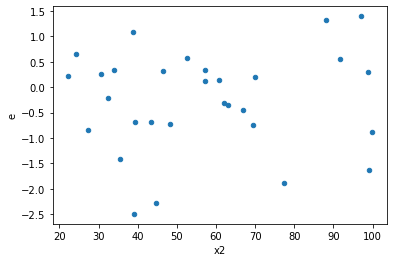

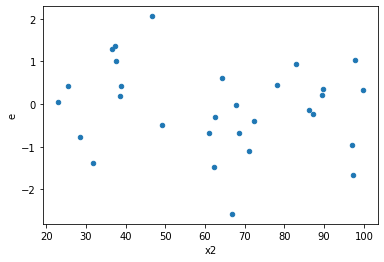

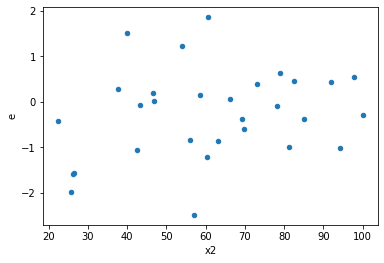

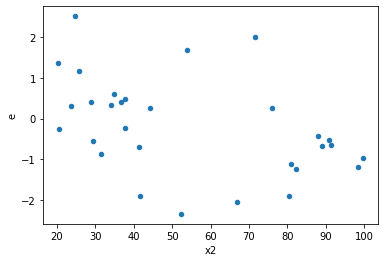

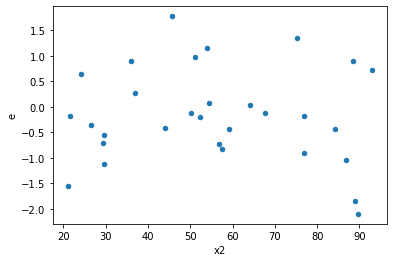

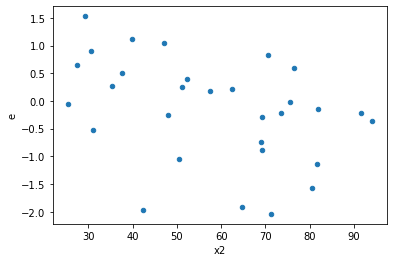

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,7.937683121194082,8.325517917436182,0.8819647912437869,0.9250575463817979,1.0488599494739916,0.9445151175766875,0.5277424412116563,0.47225755878834375,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,13.428763133098231,13.98943299228283,1.4920847925664702,1.5543814435869812,1.0417514147526141,0.9524140740019311,0.5237929629990344,0.47620703700096556,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,6.035475616443678,8.81709968777302,0.6706084018270754,0.9796777430858911,1.4608790173471655,0.581346761243333,0.7093266193783335,0.2906733806216665,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,6.954681741627943,8.72013552892305,0.7727424157364381,0.9689039476581167,1.2538511254552178,0.7416180261500758,0.6291909869249621,0.3708090130750379,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,4.911539520888736,10.821506611915957,0.5457266134320817,1.2023896235462175,2.2032819986263332,0.2549255441350906,0.8725372279324547,0.1274627720675453,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,4.821754672845437,8.831623719848054,0.5357505192050485,0.9812915244275615,1.831620295736924,0.38071948558611957,0.8096402572069402,0.19035974279305978,Reject001=1 : Homoscedasticity
10.0,9.0,9.0,5.6295279418190445,8.448374212618882,0.6255031046465604,0.9387082458465424,1.5007251584737666,0.5549773246646454,0.7225113376676773,0.2774886623323227,Reject001=1 : Homoscedasticity
13.0,9.0,9.0,4.109526796189304,6.6816747216974886,0.4566140884654782,0.7424083024108321,1.6258988085667907,0.4803045469468712,0.7598477265265644,0.2401522734734356,Reject001=1 : Homoscedasticity
15.0,9.0,9.0,6.940455422596077,14.032695655759033,0.7711617136217863,1.5591884061954482,2.021869575024243,0.3090864978209178,0.8454567510895411,0.1545432489104589,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,7.937683121194082,8.325517917436182,0.8819647912437869,0.9250575463817979,1.0488599494739916,0.9445151175766875,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,13.428763133098231,13.98943299228283,1.4920847925664702,1.5543814435869812,1.0417514147526141,0.9524140740019311,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,14.286472407948478,6.060846161263136,1.5873858231053866,0.6734273512514596,0.4242367176582443,0.21751765865286773,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,6.035475616443678,8.81709968777302,0.6706084018270754,0.9796777430858911,1.4608790173471655,0.581346761243333,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,6.954681741627943,8.72013552892305,0.7727424157364381,0.9689039476581167,1.2538511254552178,0.7416180261500758,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,11.076454066509932,4.476225690651651,1.2307171185011034,0.49735841007240567,0.4041208191514724,0.19328865903069775,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,8.602256986154732,2.39491956011728,0.9558063317949702,0.26610217334636443,0.2784059536900473,0.07045689955645985,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,4.911539520888736,10.821506611915957,0.5457266134320817,1.2023896235462175,2.2032819986263332,0.2549255441350906,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,4.821754672845437,8.831623719848054,0.5357505192050485,0.9812915244275615,1.831620295736924,0.38071948558611957,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      984
Reject001=0 : Heteroscedasticity     16
Name: Result_test, dtype: int64